In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [82]:
df = pd.read_csv('ds.csv', delimiter=",")
print(df.head())

     Nama  Kehadiran  Kedisiplinan  Tanggung Jawab  Attitude  Komunikasi  \
0   Agung          5             5               4         5           5   
1    Agus          5             5               5         5           4   
2    Asep          4             5               4         4           5   
3  Andika          4             5               5         4           4   
4  Andika          3             5               5         3           3   

   Jumlah  Keterangan  
0      24           0  
1      24           0  
2      22           0  
3      22           0  
4      19           1  


In [48]:
df.head(10)

,Nama,Kehadiran,Kedisiplinan,Tanggung Jawab,Attitude,Komunikasi,Jumlah,Keterangan
0,Agung,5,5,4,5,5,24,0
1,Agus,5,5,5,5,4,24,0
2,Asep,4,5,4,4,5,22,0
3,Andika,4,5,5,4,4,22,0
4,Andika,3,5,5,3,3,19,1
5,Ariq,3,5,5,3,5,21,0
6,Aloy,5,5,3,5,5,23,0
7,Avi,4,5,3,4,5,21,0
8,Aren,5,5,3,5,5,23,0
9,Abidah,5,5,3,5,3,21,0


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 641 entries, 0 to 640
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Nama            641 non-null    object
 1   Kehadiran       641 non-null    int64 
 2   Kedisiplinan    641 non-null    int64 
 3   Tanggung Jawab  641 non-null    int64 
 4   Attitude        641 non-null    int64 
 5   Komunikasi      641 non-null    int64 
 6   Jumlah          641 non-null    int64 
 7   Keterangan      641 non-null    int64 
dtypes: int64(7), object(1)
memory usage: 40.2+ KB


In [50]:
df.drop(['Nama'], axis=1)

,Kehadiran,Kedisiplinan,Tanggung Jawab,Attitude,Komunikasi,Jumlah,Keterangan
0,5,5,4,5,5,24,0
1,5,5,5,5,4,24,0
2,4,5,4,4,5,22,0
3,4,5,5,4,4,22,0
4,3,5,5,3,3,19,1
...,...,...,...,...,...,...,...
636,5,4,3,4,5,21,0
637,4,5,3,4,3,19,1
638,4,5,5,4,5,23,0
639,4,5,4,4,5,22,0


In [51]:
df_x = df.iloc[:, [2,6]].values
df_x

array([[ 5, 24],
       [ 5, 24],
       [ 5, 22],
       ...,
       [ 5, 23],
       [ 5, 22],
       [ 5, 23]], dtype=int64)

# CLUSTERING

c:\Users\Agung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Agung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Agung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Agung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

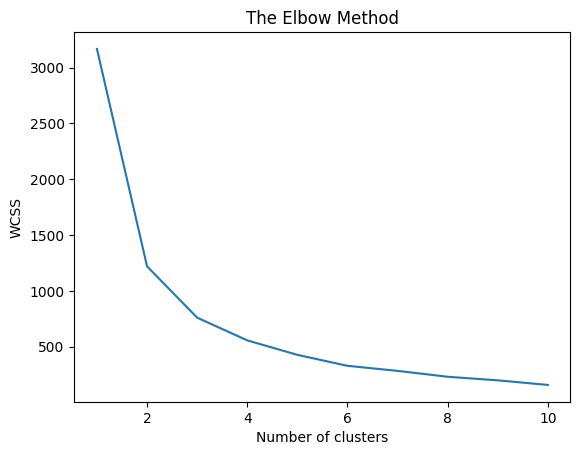

In [52]:
wcss = []

for i in range(1,11) :
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)

  kmeans.fit(df_x)
  wcss.append(kmeans.inertia_)
  
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [53]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(df_x)

c:\Users\Agung\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [54]:
y_kmeans

array([0, 0, 3, 3, 1, 2, 3, 2, 3, 2, 3, 0, 2, 2, 3, 2, 0, 1, 1, 0, 3, 3,
       3, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2, 3,
       3, 2, 4, 2, 3, 3, 2, 2, 3, 3, 1, 3, 2, 3, 3, 0, 0, 0, 2, 1, 3, 0,
       2, 3, 1, 3, 4, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3, 0, 0, 0, 2, 2, 3,
       1, 2, 2, 3, 3, 1, 1, 3, 0, 0, 0, 3, 3, 3, 4, 2, 3, 2, 3, 3, 3, 0,
       2, 2, 2, 0, 0, 0, 3, 0, 0, 1, 2, 2, 2, 0, 1, 0, 3, 3, 2, 2, 0, 0,
       0, 0, 0, 3, 3, 1, 2, 3, 2, 3, 2, 3, 0, 2, 2, 3, 2, 0, 1, 1, 0, 3,
       3, 3, 2, 2, 1, 1, 2, 0, 2, 0, 0, 2, 2, 3, 2, 0, 0, 0, 0, 0, 0, 2,
       3, 3, 2, 4, 2, 3, 3, 2, 2, 3, 3, 0, 3, 2, 0, 0, 3, 1, 4, 3, 2, 3,
       3, 0, 3, 1, 1, 1, 3, 2, 3, 3, 0, 0, 0, 2, 1, 3, 0, 2, 3, 1, 3, 4,
       2, 3, 0, 3, 3, 0, 1, 3, 3, 2, 2, 2, 0, 2, 3, 3, 3, 2, 3, 3, 3, 0,
       0, 0, 2, 2, 3, 1, 2, 2, 1, 1, 1, 4, 4, 2, 3, 4, 1, 4, 1, 1, 4, 1,
       1, 1, 2, 1, 4, 1, 1, 4, 0, 4, 1, 1, 1, 1, 2, 4, 0, 4, 2, 4, 2, 1,
       4, 2, 1, 0, 4, 4, 4, 2, 2, 4, 2, 1, 1, 1, 4,

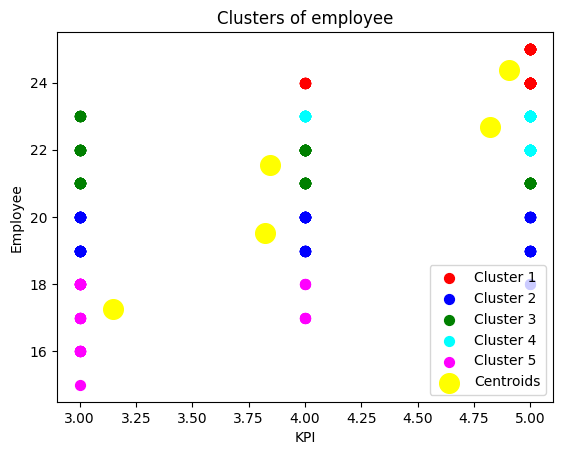

In [55]:
plt.scatter(df_x[y_kmeans == 0, 0], df_x[y_kmeans == 0, 1], s = 50, c='red', label ='Cluster 1')
plt.scatter(df_x[y_kmeans == 1, 0], df_x[y_kmeans == 1, 1], s = 50, c='blue', label ='Cluster 2')
plt.scatter(df_x[y_kmeans == 2, 0], df_x[y_kmeans == 2, 1], s = 50, c='green', label ='Cluster 3')
plt.scatter(df_x[y_kmeans == 3, 0], df_x[y_kmeans == 3, 1], s = 50, c='cyan', label ='Cluster 4')
plt.scatter(df_x[y_kmeans == 4, 0], df_x[y_kmeans == 4, 1], s = 50, c='magenta', label ='Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='yellow', label = 'Centroids')
plt.title('Clusters of employee')
plt.xlabel('KPI')
plt.ylabel('Employee')
plt.legend()
plt.show()

# KLASIFIKASI

In [56]:
x = df.iloc [:, :7].values
y = df.iloc [:, 7].values

In [57]:
print(x)

[['Agung' 5 5 ... 5 5 24]
 ['Agus' 5 5 ... 5 4 24]
 ['Asep' 4 5 ... 4 5 22]
 ...
 ['Zidane' 4 5 ... 4 5 23]
 ['Ziva' 4 5 ... 4 5 22]
 ['Zulfian' 4 5 ... 4 5 23]]


In [58]:
print(y)

[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 1
 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1
 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 1 1 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 1 0 0 1 1 1 0
 0 1 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [59]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
x[:, 0] = le.fit_transform(x[:, 0])

# SPLIT DATA

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 5, random_state = 0)

In [62]:
print(x_test)

[[100 5 4 5 4 4 22]
 [132 4 5 5 4 5 23]
 [444 5 3 3 5 3 19]
 [85 3 5 5 3 5 21]
 [445 4 5 4 4 5 22]]


In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [65]:
print(x_train)

[[-0.60366287  0.8524885   0.89117156 ...  0.80304593  0.83325416
   1.60493992]
 [-0.54353818  0.8524885  -0.31990774 ...  0.80304593 -0.44066326
   0.15433577]
 [ 1.07982862 -0.4699083   0.89117156 ... -0.62359432  0.83325416
  -0.32919895]
 ...
 [-0.61702392  0.8524885   0.89117156 ...  0.80304593  0.83325416
   0.63787049]
 [ 1.36709106  0.8524885  -1.53098704 ... -0.62359432 -0.44066326
  -1.29626839]
 [ 0.89945453  0.8524885  -1.53098704 ...  0.80304593 -1.71458067
  -0.32919895]]


# Training

In [66]:
from sklearn.naive_bayes import GaussianNB

In [67]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

# Predict

In [68]:
y_pred = classifier.predict(x_test)

In [69]:
print(y_pred)

[0 0 1 0 0]


In [70]:
print(y_test)

[0 0 1 0 0]


# Evaluasi

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [72]:
cs = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)

In [73]:
cs

array([[4, 0],
       [0, 1]], dtype=int64)

In [74]:
ac

1.0

In [75]:
df[df['Keterangan'] == 0] ['Keterangan'].count()

538

In [76]:
df[df['Keterangan'] == 1] ['Keterangan'].count()

103

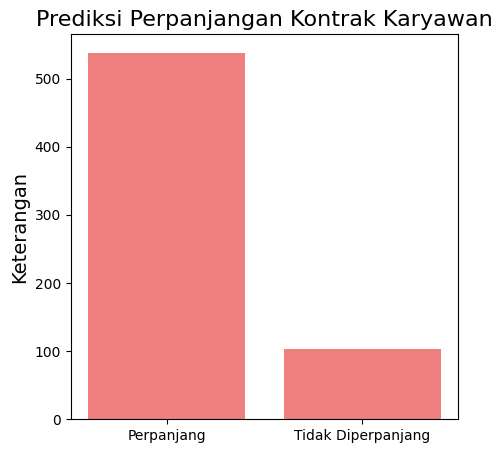

In [77]:
figure = ['Perpanjang', 'Tidak Diperpanjang']
target = [538, 103]

plt.figure(figsize=(5,5))
plt.bar(figure, target, color='lightcoral')

plt.title('Prediksi Perpanjangan Kontrak Karyawan', size=16)
plt.ylabel('Keterangan', size=14)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

In [78]:
import pickle

In [80]:
filename = 'employee.sav'
pickle.dump(classifier, open(filename, 'wb'))